# Discovering Communities in Real-World Networks Using Louvain and Girvan–Newman Algorithms

# 1. Dolphin Dataset Network Analysis

In [ ]:
# Install required packages
!pip install networkx community numpy scipy matplotlib

In [ ]:
!pip install python-louvain

In [ ]:
# Import necessary libraries
import community.community_louvain as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import mmread
from networkx.algorithms.community import girvan_newman
import time

In [ ]:
# Upload and read Matrix Market file (.mtx) for Dolphin dataset
from google.colab import files
uploaded = files.upload()

Saving soc-dolphins.mtx to soc-dolphins.mtx


In [ ]:
# Load the .mtx file and convert to NetworkX graph
matrix = mmread("soc-dolphins.mtx").tocoo()
G = nx.Graph()
G.add_edges_from(zip(matrix.row, matrix.col))

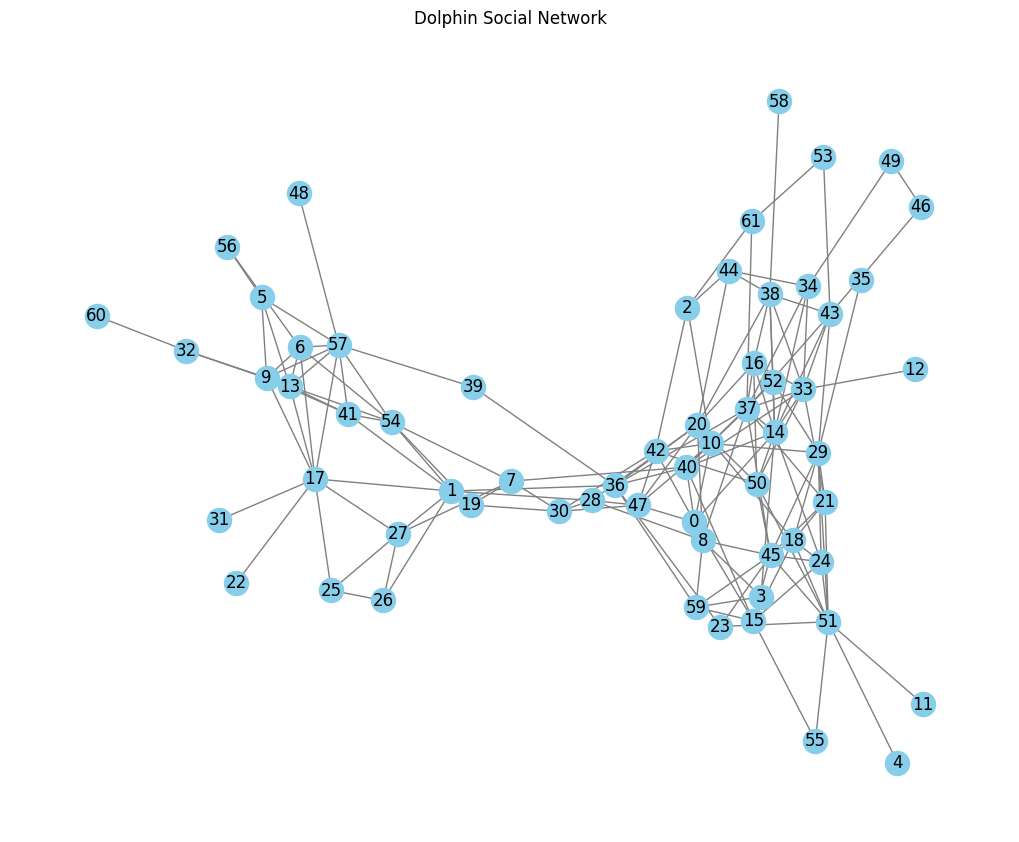

In [ ]:
# Visualize graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Dolphin Social Network")
plt.show()

In [ ]:
# Graph properties
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Graph density:", nx.density(G))
print("Is graph connected:", nx.is_connected(G))
print("Average degree:", np.mean([deg for _, deg in G.degree()]))

Number of nodes: 62
Number of edges: 159
Graph density: 0.08408249603384453
Is graph connected: True
Average degree: 5.129032258064516


**Lovain Algorithm**

In [ ]:
# Louvain community detection
start = time.time()
partition = community_louvain.best_partition(G)
end = time.time()

# Number of communities
num_communities = len(set(partition.values()))
print("Number of Louvain communities:", num_communities)

# Modularity score
modularity = community_louvain.modularity(partition, G)
print("Louvain modularity:", modularity)
print("Time taken:", round(end - start, 4), "seconds")

# Community sizes
from collections import Counter
print("Community sizes:", Counter(partition.values()))

Number of Louvain communities: 5
Louvain modularity: 0.5277283335311103
Time taken: 0.0065 seconds
Community sizes: Counter({3: 20, 1: 18, 2: 12, 4: 7, 0: 5})


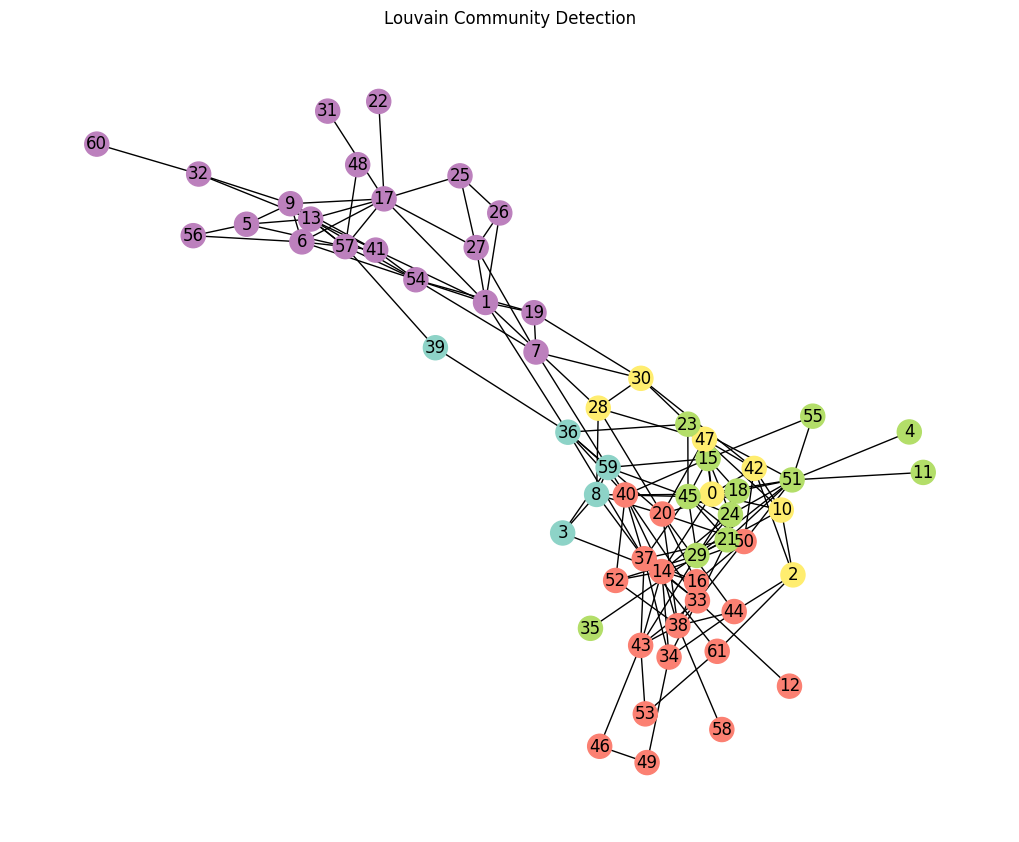

In [ ]:
# Visualize Louvain communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set3)
plt.title("Louvain Community Detection")
plt.show()

**Girvan Newman Algorithm**

In [ ]:
from itertools import islice
import time

# Girvan–Newman community detection
start = time.time()

gn_generator = girvan_newman(G)
limited = list(islice(gn_generator, 3))  # Take 3 community splits
top_level_communities = limited[-1]     # Get the last one (deepest split)

end = time.time()

# Convert result to list of sets
communities = [set(c) for c in top_level_communities]
print("Number of Girvan–Newman communities:", len(communities))

# Optional modularity for comparison
gn_modularity = community_louvain.modularity(
    {node: i for i, com in enumerate(communities) for node in com}, G
)
print("Girvan–Newman modularity:", gn_modularity)
print("Time taken:", round(end - start, 4), "seconds")


Number of Girvan–Newman communities: 4
Girvan–Newman modularity: 0.45807127882599574
Time taken: 0.3444 seconds


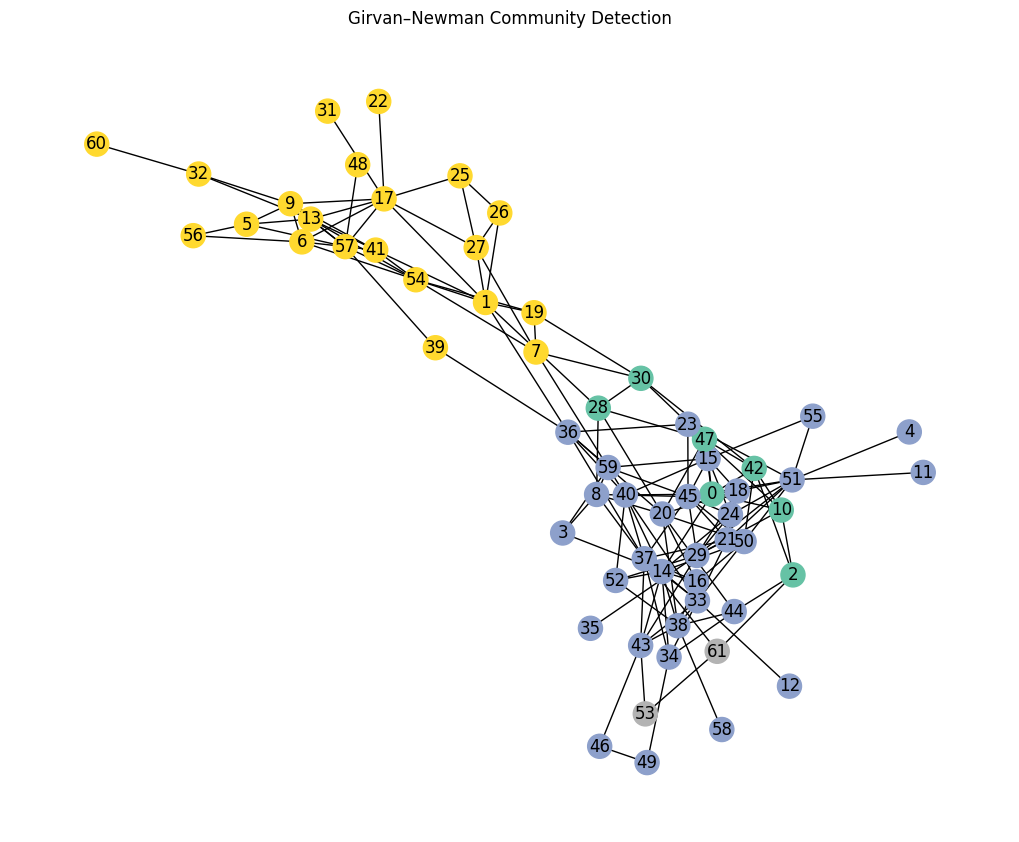

In [ ]:
# Visualize Girvan–Newman communities
plt.figure(figsize=(10, 8))
community_map = {}
for idx, community in enumerate(communities):
    for node in community:
        community_map[node] = idx
colors = [community_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set2)
plt.title("Girvan–Newman Community Detection")
plt.show()

**Comparative Analysis**

In [ ]:
print("Louvain Algorithm:")
print(f" Communities: {num_communities}, Modularity: {modularity:.4f}")
print("Girvan–Newman Algorithm:")
print(f" Communities: {len(communities)}, Modularity: {gn_modularity:.4f}")

Louvain Algorithm:
 Communities: 5, Modularity: 0.5277
Girvan–Newman Algorithm:
 Communities: 4, Modularity: 0.4581


# 2. Facebook Dataset

In [ ]:
# Import the pandas library
import pandas as pd

# Load the Facebook dataset (automatically download from Stanford)
url = "http://snap.stanford.edu/data/facebook_combined.txt.gz"
facebook_df = pd.read_csv(url, compression='gzip', sep=' ', names=['source', 'target'])

# Create graph
G_fb = nx.from_pandas_edgelist(facebook_df)

# Basic graph properties
print("Number of nodes:", G_fb.number_of_nodes())
print("Number of edges:", G_fb.number_of_edges())
print("Graph density:", nx.density(G_fb))
print("Is graph connected:", nx.is_connected(G_fb))
print("Average degree:", np.mean([deg for _, deg in G_fb.degree()]))

Number of nodes: 4039
Number of edges: 88234
Graph density: 0.010819963503439287
Is graph connected: True
Average degree: 43.69101262688784


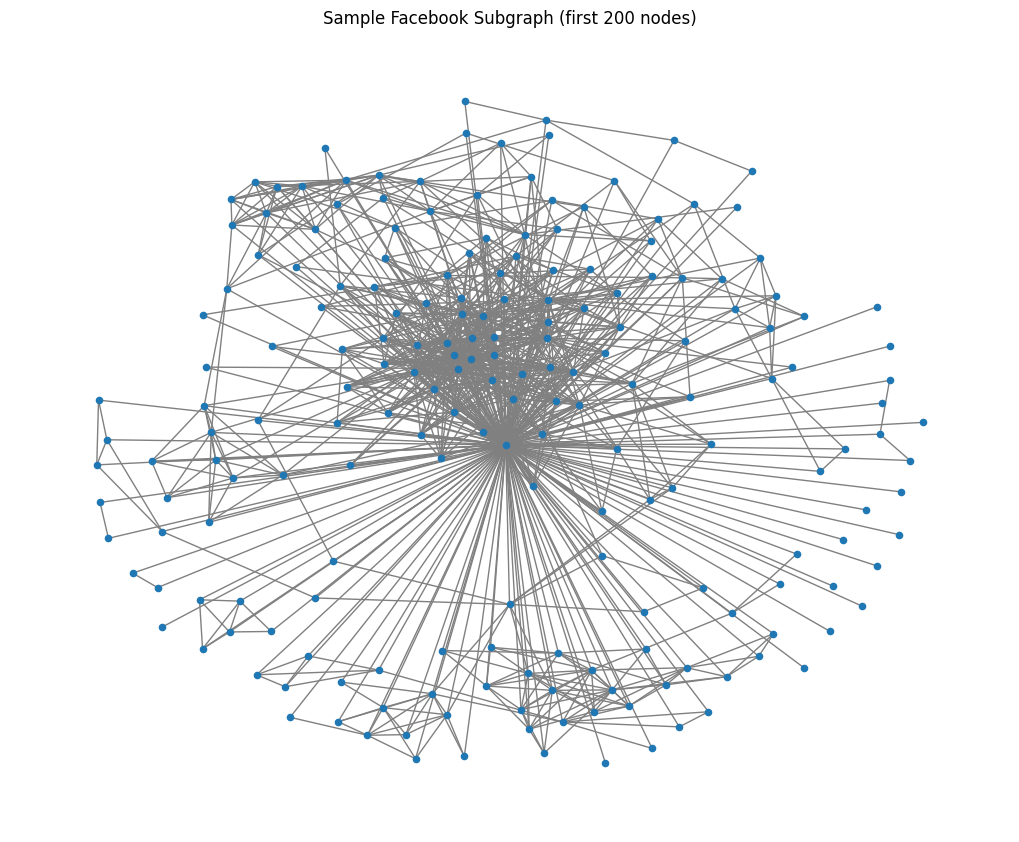

In [ ]:
# Visualize sample (too large to plot fully)
sample_nodes = list(G_fb.nodes())[:200]
G_sample = G_fb.subgraph(sample_nodes)
plt.figure(figsize=(10, 8))
nx.draw(G_sample, with_labels=False, node_size=20, edge_color='gray')
plt.title("Sample Facebook Subgraph (first 200 nodes)")
plt.show()

**Centrality Analysis**

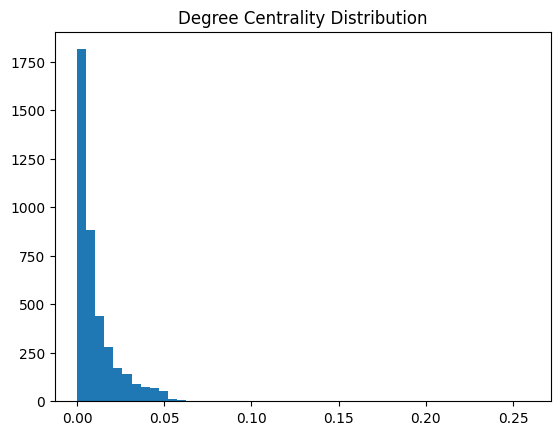

Top 8 degree nodes: [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354), (2543, 0.07280832095096582), (2347, 0.07206537890044576), (1888, 0.0629024269440317)]


In [ ]:
deg_cent = nx.degree_centrality(G_fb)
close_cent = nx.closeness_centrality(G_fb)
between_cent = nx.betweenness_centrality(G_fb)
eig_cent = nx.eigenvector_centrality(G_fb)

# Visualize degree centrality
plt.hist(deg_cent.values(), bins=50)
plt.title("Degree Centrality Distribution")
plt.show()

In [ ]:
top8_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:8]

print("Top 8 Nodes by Degree Centrality:")
print("-" * 35)
print("{:<10} {:>20}".format("Node", "Degree Centrality"))
print("-" * 35)
for node, centrality in top8_deg:
    print("{:<10} {:>20.4f}".format(node, centrality))


Top 8 Nodes by Degree Centrality:
-----------------------------------
Node          Degree Centrality
-----------------------------------
107                      0.2588
1684                     0.1961
1912                     0.1870
3437                     0.1355
0                        0.0859
2543                     0.0728
2347                     0.0721
1888                     0.0629


**Clustering & Triangles**

In [ ]:
print("Average Clustering:", nx.average_clustering(G_fb))

triangles = nx.triangles(G_fb)
print("Mean triangles:", np.mean(list(triangles.values())))
print("Median triangles:", np.median(list(triangles.values())))

Average Clustering: 0.6055467186200876
Mean triangles: 1197.3334983906907
Median triangles: 161.0


**Bridges**

In [ ]:
bridges = list(nx.bridges(G_fb))
print("Number of bridges:", len(bridges))

local_bridges = list(nx.local_bridges(G_fb))
print("Number of local bridges:", len(local_bridges))

Number of bridges: 75
Number of local bridges: 78


**Louvain Algorithm**

In [ ]:
# Apply Louvain algorithm on a smaller subgraph (first 500 nodes)
sub_nodes = list(G_fb.nodes())[:500]
G_sub = G_fb.subgraph(sub_nodes).copy()

start = time.time()
partition_fb = community_louvain.best_partition(G_sub)
end = time.time()

# Number of communities
num_com_fb = len(set(partition_fb.values()))
print("Number of Louvain communities:", num_com_fb)

# Modularity score
mod_fb = community_louvain.modularity(partition_fb, G_sub)
print("Louvain modularity:", mod_fb)
print("Time taken:", round(end - start, 4), "seconds")

# Community sizes
from collections import Counter
print("Community sizes:", Counter(partition_fb.values()))

Number of Louvain communities: 6
Louvain modularity: 0.5517472048231411
Time taken: 0.0703 seconds
Community sizes: Counter({5: 150, 0: 131, 3: 116, 2: 39, 4: 34, 1: 30})


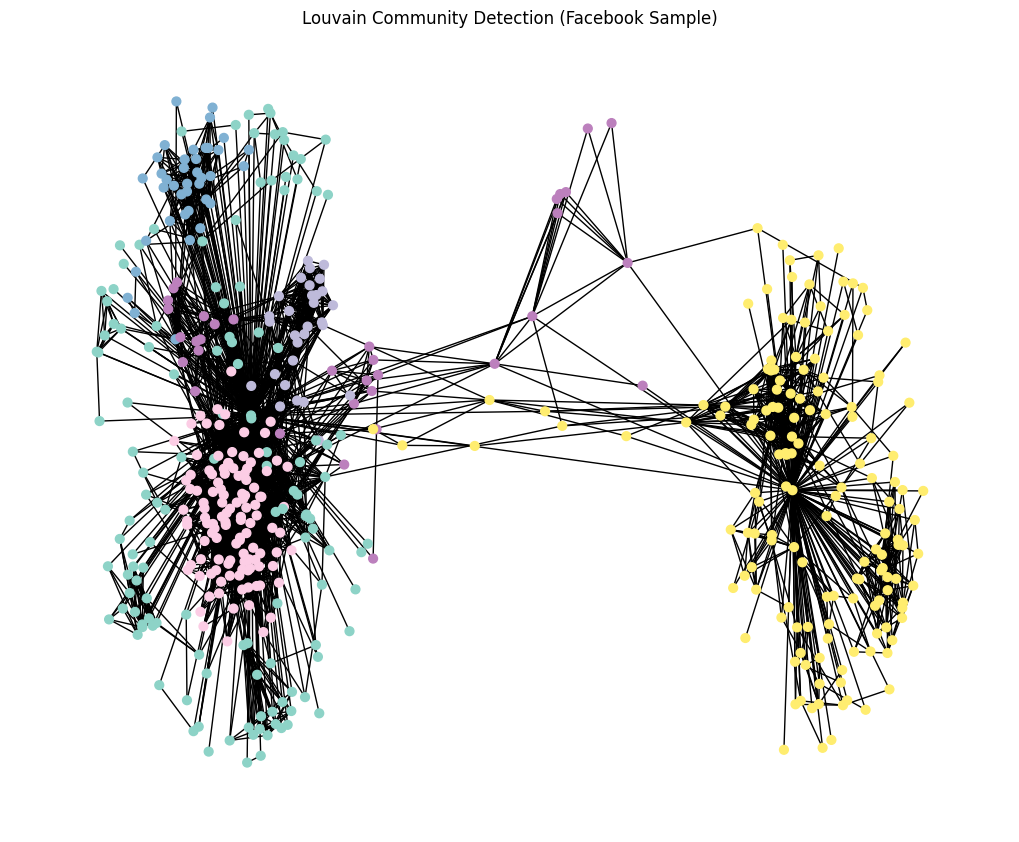

In [ ]:
# Visualize
pos = nx.spring_layout(G_sub)
colors = [partition_fb[node] for node in G_sub.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(G_sub, pos, node_color=colors, with_labels=False, cmap=plt.cm.Set3, node_size=40)
plt.title("Louvain Community Detection (Facebook Sample)")
plt.show()

**Girvan-Newman Algorithm**

In [ ]:
from itertools import islice
import time

start = time.time()

# Create the generator
gn_generator_fb = girvan_newman(G_sub)

# Extract the 3rd level of community split (gives approx 4 communities)
top_level_fb = list(islice(gn_generator_fb, 3))[-1]

end = time.time()

# Convert result to list of sets
communities_fb = [set(c) for c in top_level_fb]

print("Number of Girvan–Newman communities:", len(communities_fb))

# Optional modularity
mod_fb_gn = community_louvain.modularity(
    {node: i for i, com in enumerate(communities_fb) for node in com}, G_sub)

print("Girvan–Newman modularity:", mod_fb_gn)
print("Time taken:", round(end - start, 4), "seconds")


Number of Girvan–Newman communities: 4
Girvan–Newman modularity: 0.3017083308720592
Time taken: 39.0091 seconds


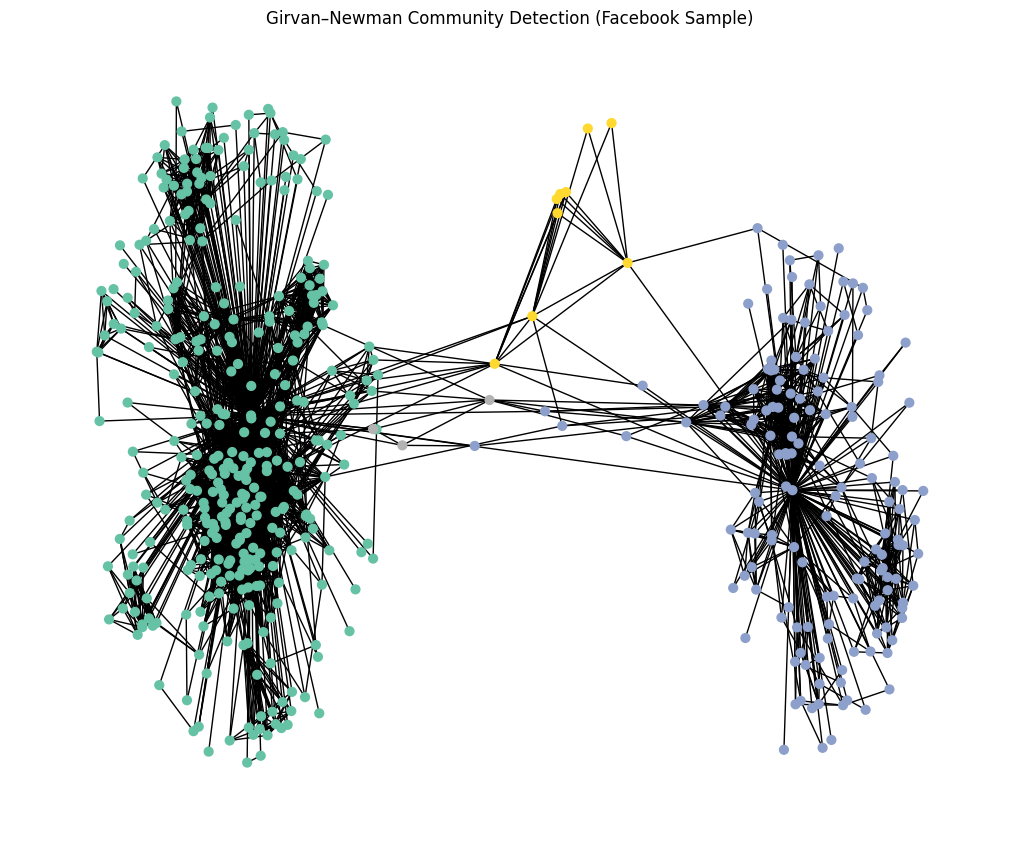

In [ ]:
# Visualize
community_map_fb = {}
for idx, community in enumerate(communities_fb):
    for node in community:
        community_map_fb[node] = idx
colors = [community_map_fb[node] for node in G_sub.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(G_sub, pos, node_color=colors, with_labels=False, cmap=plt.cm.Set2, node_size=40)
plt.title("Girvan–Newman Community Detection (Facebook Sample)")
plt.show()

**Comparative Analysis**

In [ ]:
print("Louvain Algorithm:")
print(f" Communities: {num_com_fb}, Modularity: {mod_fb:.4f}")
print("Girvan–Newman Algorithm:")
print(f" Communities: {len(communities_fb)}, Modularity: {mod_fb_gn:.4f}")

Louvain Algorithm:
 Communities: 6, Modularity: 0.5517
Girvan–Newman Algorithm:
 Communities: 4, Modularity: 0.3017
